# Introdução

Este notebook tem como objetivo realizar uma análise detalhada das vendas da concessionária, explorando diferentes perspectivas do desempenho comercial. Serão abordados indicadores gerais de vendas, distribuição por regiões, identificação dos modelos mais vendidos, além de análises temporais que contemplam agrupamentos por mês e por ano. Essas informações permitirão compreender melhor o comportamento do mercado, identificar tendências e apoiar a tomada de decisões estratégicas.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [95]:
# Importando os dados
df_vendas = pd.read_csv('../data/vendas.csv')
df_carros = pd.read_csv('../data/carros.csv')
df_clientes = pd.read_csv('../data/clientes.csv')
df_vendedores = pd.read_csv('../data/funcionarios.csv')

In [96]:
df_vendas.head(5)

,id_venda,carro_id,cliente_id,vendedor_id,data_venda,valor_venda
0,1,153,589,3,2025-03-22,94964
1,2,585,561,27,2025-02-02,147454
2,3,457,284,8,2021-07-13,92146
3,4,39,757,10,2020-10-04,69770
4,5,946,866,24,2025-07-05,98011


In [97]:
df_carros.head(5)

,id_carro,marca,modelo,ano,cor,preco,fornecedor,condicao,quilometragem
0,1,Toyota,Hilux,2022,Preto,120901,MegaMotors,novo,0
1,2,Honda,Fit,2024,Branco,122996,VeículoPlus,usado,82654
2,3,Nissan,Sentra,2025,Vermelho,88307,DriveMax,usado,77334
3,4,Toyota,Corolla,2020,Verde,97047,DriveMax,usado,83502
4,5,Volkswagen,Polo,2022,Vermelho,72909,MegaMotors,usado,101382


In [98]:
df_clientes.head(5)

,id,nome,sexo,data_nascimento,uf,email,telefone,faixa_renda,tipo_carro,forma_pagamento
0,1,Liam,M,02/12/1984,MG,alopes@example.org,+55 (46) 95297-5940,43668.15,Hatch,Cartão de Débito
1,2,Eduardo,M,09/09/1959,RJ,maria-julia42@example.com,+55 (57) 94941 5826,39924.16,Híbrido,Cartão de Débito
2,3,Catarina,F,21/08/1988,RS,tpastor@example.org,+55 64 9 9422-4015,45130.75,Utilitário,Cartão de Débito
3,4,Rhavi,M,25/10/1974,PE,nicolepastor@example.com,+55 (10) 94399 3348,17686.66,Van,Cartão de Débito
4,5,Alexandre,M,24/10/1947,AC,jporto@example.com,+55 (72) 9 9724 2650,56620.77,SUV,Dinheiro


In [99]:
df_vendedores.head(5)

,id_funcionario,nome,sexo,cargo,salario
0,1,Noah,M,Vendedor,2500
1,2,Théo,M,Assistente de Vendas,1518
2,3,Davi,M,Assistente de Vendas,1518
3,4,Arthur Gabriel,M,Vendedor,2500
4,5,Ana Laura,F,Auxiliar administrativo,1518


## Limpeza de dados 
Limpando colunas desnecessárias das tabelas.

In [100]:
df_carros = df_carros.drop(columns=['cor', 'ano'])

In [101]:
df_carros.head()

,id_carro,marca,modelo,preco,fornecedor,condicao,quilometragem
0,1,Toyota,Hilux,120901,MegaMotors,novo,0
1,2,Honda,Fit,122996,VeículoPlus,usado,82654
2,3,Nissan,Sentra,88307,DriveMax,usado,77334
3,4,Toyota,Corolla,97047,DriveMax,usado,83502
4,5,Volkswagen,Polo,72909,MegaMotors,usado,101382


In [102]:
df_clientes = df_clientes.drop(columns=['email', 'telefone'])

In [103]:
df_clientes.head()

,id,nome,sexo,data_nascimento,uf,faixa_renda,tipo_carro,forma_pagamento
0,1,Liam,M,02/12/1984,MG,43668.15,Hatch,Cartão de Débito
1,2,Eduardo,M,09/09/1959,RJ,39924.16,Híbrido,Cartão de Débito
2,3,Catarina,F,21/08/1988,RS,45130.75,Utilitário,Cartão de Débito
3,4,Rhavi,M,25/10/1974,PE,17686.66,Van,Cartão de Débito
4,5,Alexandre,M,24/10/1947,AC,56620.77,SUV,Dinheiro


# Analisando clientes

### Transformando dados
Como vamos analisar também nossos clientes, vamos anexar a idade atual de cada um em uma coluna para entendermos a distribuição.

In [104]:
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], dayfirst=True)

In [105]:
df_clientes.head(5)

,id,nome,sexo,data_nascimento,uf,faixa_renda,tipo_carro,forma_pagamento
0,1,Liam,M,1984-12-02,MG,43668.15,Hatch,Cartão de Débito
1,2,Eduardo,M,1959-09-09,RJ,39924.16,Híbrido,Cartão de Débito
2,3,Catarina,F,1988-08-21,RS,45130.75,Utilitário,Cartão de Débito
3,4,Rhavi,M,1974-10-25,PE,17686.66,Van,Cartão de Débito
4,5,Alexandre,M,1947-10-24,AC,56620.77,SUV,Dinheiro


In [106]:
hoje = datetime.today()
def calcular_idade(data_nascimento, referencia):
    anos = referencia.year - data_nascimento.year
    # Se ainda não fez aniversário neste ano, subtrai 1
    if (referencia.month, referencia.day) < (data_nascimento.month, data_nascimento.day):
        anos -= 1
    return anos

df_clientes['idade'] = df_clientes['data_nascimento'].apply(lambda x: calcular_idade(x, hoje))

In [107]:
df_clientes.head()

,id,nome,sexo,data_nascimento,uf,faixa_renda,tipo_carro,forma_pagamento,idade
0,1,Liam,M,1984-12-02,MG,43668.15,Hatch,Cartão de Débito,40
1,2,Eduardo,M,1959-09-09,RJ,39924.16,Híbrido,Cartão de Débito,65
2,3,Catarina,F,1988-08-21,RS,45130.75,Utilitário,Cartão de Débito,37
3,4,Rhavi,M,1974-10-25,PE,17686.66,Van,Cartão de Débito,50
4,5,Alexandre,M,1947-10-24,AC,56620.77,SUV,Dinheiro,77


Criando a faixa de idade para entendermos a distribuição

In [108]:
df_clientes['faixa_idade'] = pd.cut(df_clientes['idade'], bins = 5)
df_clientes.head()

,id,nome,sexo,data_nascimento,uf,faixa_renda,tipo_carro,forma_pagamento,idade,faixa_idade
0,1,Liam,M,1984-12-02,MG,43668.15,Hatch,Cartão de Débito,40,"(30.4, 42.8]"
1,2,Eduardo,M,1959-09-09,RJ,39924.16,Híbrido,Cartão de Débito,65,"(55.2, 67.6]"
2,3,Catarina,F,1988-08-21,RS,45130.75,Utilitário,Cartão de Débito,37,"(30.4, 42.8]"
3,4,Rhavi,M,1974-10-25,PE,17686.66,Van,Cartão de Débito,50,"(42.8, 55.2]"
4,5,Alexandre,M,1947-10-24,AC,56620.77,SUV,Dinheiro,77,"(67.6, 80.0]"


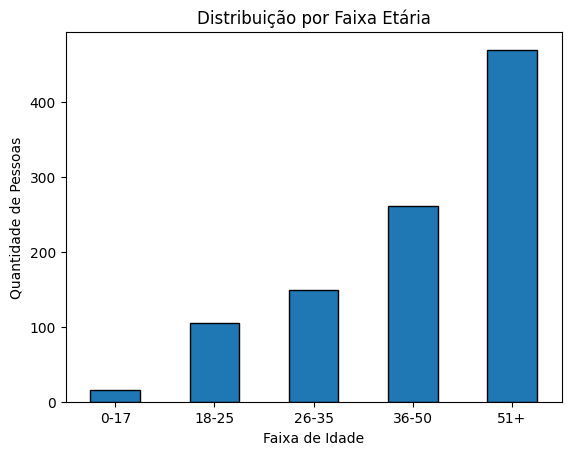

In [133]:
# histograma
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-17', '18-25', '26-35', '36-50', '51+']

df_clientes['faixa_idade'] = pd.cut(df_clientes['idade'], bins=bins, labels=labels)

contagem = df_clientes['faixa_idade'].value_counts().sort_index()


# Plotar
contagem.plot(kind='bar', edgecolor='black')
plt.title("Distribuição por Faixa Etária")
plt.xlabel("Faixa de Idade")
plt.ylabel("Quantidade de Pessoas")
plt.xticks(rotation=0)  # deixa os labels do X na horizontal
plt.savefig('./output/distri')
plt.show()

In [110]:
publico_51 = df_clientes[(df_clientes['faixa_idade']) == "51+"]
publico_36 = df_clientes[(df_clientes['faixa_idade']) == "36-50"]
publico_26 = df_clientes[(df_clientes['faixa_idade']) == "26-35"]
publico_18 = df_clientes[(df_clientes['faixa_idade']) == "18-25"]


In [111]:
media_publico_51 = round(publico_51['faixa_renda'].mean(),2)
media_publico_18 = round(publico_18['faixa_renda'].mean(),2)

In [112]:
print(f'A média de renda do público que mais compra é de: R$ {media_publico_51}')
print(f'A média de renda do público que menos compra é de: R$ {media_publico_18}')

A média de renda do público que mais compra é de: R$ 31228.97
A média de renda do público que menos compra é de: R$ 31533.07


In [113]:
df_clientes.head()

,id,nome,sexo,data_nascimento,uf,faixa_renda,tipo_carro,forma_pagamento,idade,faixa_idade
0,1,Liam,M,1984-12-02,MG,43668.15,Hatch,Cartão de Débito,40,36-50
1,2,Eduardo,M,1959-09-09,RJ,39924.16,Híbrido,Cartão de Débito,65,51+
2,3,Catarina,F,1988-08-21,RS,45130.75,Utilitário,Cartão de Débito,37,36-50
3,4,Rhavi,M,1974-10-25,PE,17686.66,Van,Cartão de Débito,50,36-50
4,5,Alexandre,M,1947-10-24,AC,56620.77,SUV,Dinheiro,77,51+


In [114]:
# Verificando a distribuição de clientes por sexo
count_m = (df_clientes['sexo'] == 'M').sum()
count_f = (df_clientes['sexo'] == 'F').sum()

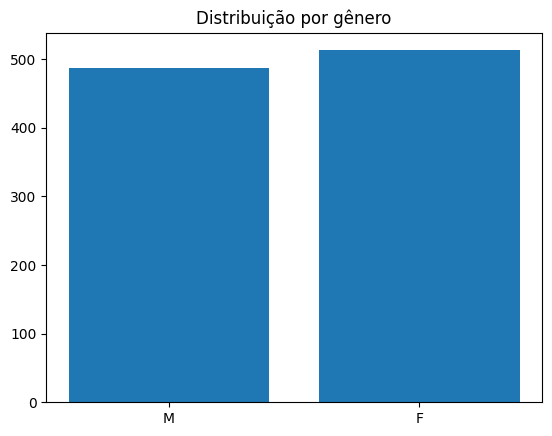

In [134]:
genero = ['M', 'F']
contagem = [count_m, count_f]
plt.bar(genero, contagem)
plt.title('Distribuição por gênero')
plt.show()

### Conclusões sobre clientes
Podemos observar que a maioria dos nossos clientes possuem mais de 51 anos, porém a média de renda é praticamente igual a média do nosso público que menos compra, isso pode indicar fortes outliers ou dados que não seguem um padrão, na questão de gênero, nosso clientes estão bem distribuídos, não há uma diferença numérica considerável.

# Análise de vendas

In [116]:
df_vendas.head()

,id_venda,carro_id,cliente_id,vendedor_id,data_venda,valor_venda
0,1,153,589,3,2025-03-22,94964
1,2,585,561,27,2025-02-02,147454
2,3,457,284,8,2021-07-13,92146
3,4,39,757,10,2020-10-04,69770
4,5,946,866,24,2025-07-05,98011


In [117]:
# Limpando os dados
df_carros = df_carros.drop(columns=['quilometragem'])

In [118]:
df_carros.head()

,id_carro,marca,modelo,preco,fornecedor,condicao
0,1,Toyota,Hilux,120901,MegaMotors,novo
1,2,Honda,Fit,122996,VeículoPlus,usado
2,3,Nissan,Sentra,88307,DriveMax,usado
3,4,Toyota,Corolla,97047,DriveMax,usado
4,5,Volkswagen,Polo,72909,MegaMotors,usado


In [119]:
# Renomeando a coluna que estabelece o relacionamento entre as tabelas
df_carros = df_carros.rename(columns = {'id_carro' : 'carro_id'})

In [120]:
df_carros.head()

,carro_id,marca,modelo,preco,fornecedor,condicao
0,1,Toyota,Hilux,120901,MegaMotors,novo
1,2,Honda,Fit,122996,VeículoPlus,usado
2,3,Nissan,Sentra,88307,DriveMax,usado
3,4,Toyota,Corolla,97047,DriveMax,usado
4,5,Volkswagen,Polo,72909,MegaMotors,usado


In [121]:
# Unindo tabelas
relatorio_vendas = pd.merge(df_vendas, df_carros, on='carro_id', how='inner')

In [122]:
relatorio_vendas.head()

,id_venda,carro_id,cliente_id,vendedor_id,data_venda,valor_venda,marca,modelo,preco,fornecedor,condicao
0,1,153,589,3,2025-03-22,94964,Toyota,Corolla,94964,TopCar,novo
1,2,585,561,27,2025-02-02,147454,Volkswagen,Gol,147454,TopCar,novo
2,3,457,284,8,2021-07-13,92146,Hyundai,HB20,92146,MegaMotors,usado
3,4,39,757,10,2020-10-04,69770,Chevrolet,Prisma,69770,AutoPrime,usado
4,5,946,866,24,2025-07-05,98011,Hyundai,HB20,98011,CarMaster,novo


In [123]:
agrupando_marca = relatorio_vendas.groupby('marca')['valor_venda'].sum().reset_index()
agrupando_marca = agrupando_marca.sort_values(by='valor_venda', ascending=False)
agrupando_marca.head()

,marca,valor_venda
4,Nissan,15148876
5,Toyota,14586191
3,Hyundai,14454609
6,Volkswagen,13311459
1,Ford,12952188


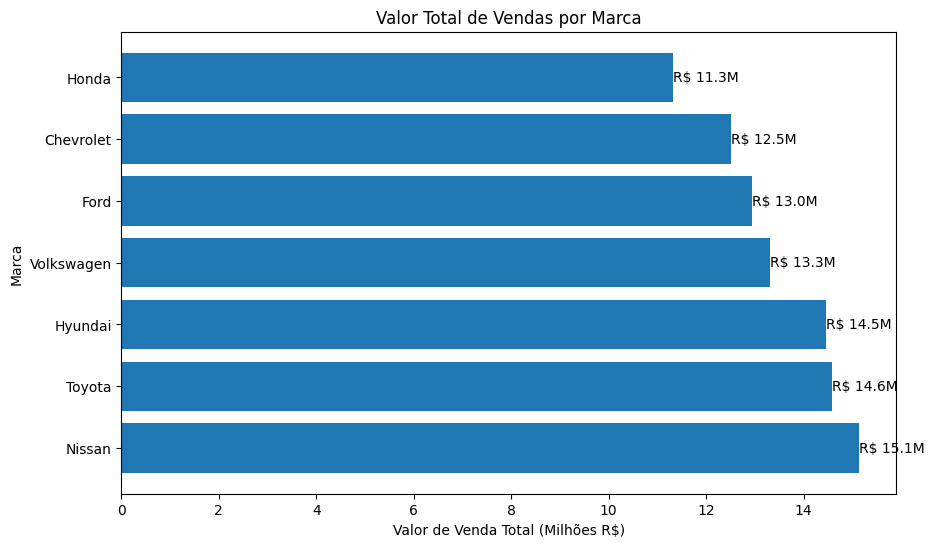

In [138]:
# Formatando valores em milhões
plt.figure(figsize=(10, 6))
bars = plt.barh(agrupando_marca['marca'], agrupando_marca['valor_venda'] / 1e6)  # Divide por 1 milhão

plt.xlabel('Valor de Venda Total (Milhões R$)')
plt.ylabel('Marca')
plt.title('Valor Total de Vendas por Marca')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'R$ {width:.1f}M', 
             ha='left', va='center')

plt.savefig('./output/vendas')
plt.show()

In [125]:
agrupando_modelo = relatorio_vendas.groupby('modelo')['valor_venda'].sum().reset_index()
agrupando_modelo = agrupando_modelo.sort_values(by='valor_venda', ascending=False)
agrupando_modelo.head()

,modelo,valor_venda
9,Hilux,5720990
19,Versa,5696650
7,HB20,5426096
6,Gol,5348318
1,Corolla,5147992


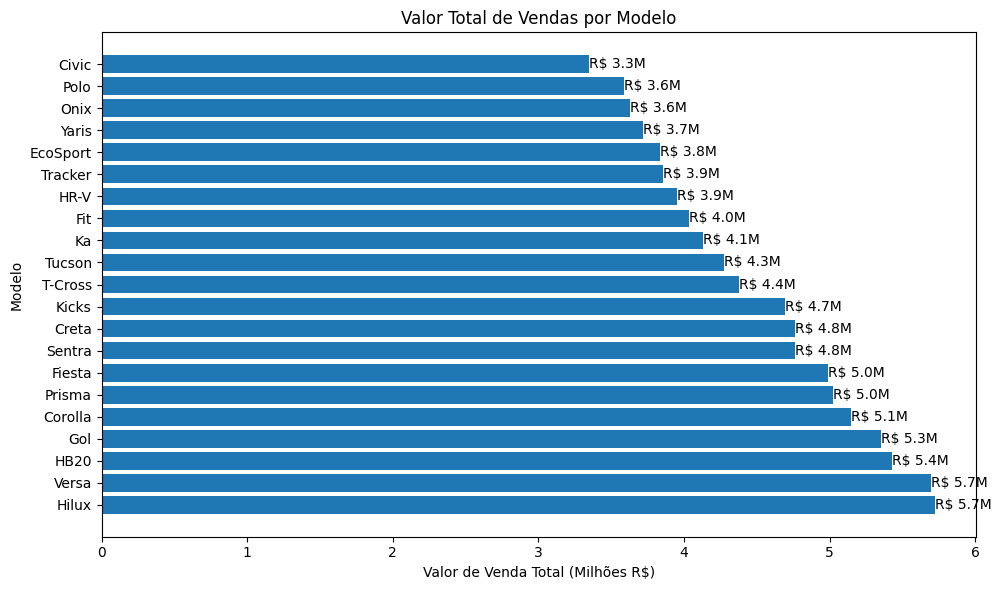

In [126]:
plt.figure(figsize=(10, 6))
bars = plt.barh(agrupando_modelo['modelo'], 
                agrupando_modelo['valor_venda'] / 1e6,  # Valores em milhões
                height=0.8)  # ⬅️ AUMENTE A ALTURA DAS BARRAS (padrão é 0.8)

plt.xlabel('Valor de Venda Total (Milhões R$)')
plt.ylabel('Modelo')
plt.title('Valor Total de Vendas por Modelo')
plt.tight_layout()

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'R$ {width:.1f}M', 
             ha='left', va='center')

plt.show()

In [127]:
valor_faturado = df_vendas['valor_venda'].sum()
print(f"O valor total faturado foi de R$ {valor_faturado}")

O valor total faturado foi de R$ 94284708


In [128]:
# renomeando para fazer o merge com clientes
df_clientes = df_clientes.rename(columns = {'id' : 'cliente_id'})

In [129]:
relatorio_vendas = pd.merge(relatorio_vendas, df_clientes, on='cliente_id', how='inner')

In [130]:
agrupando_uf =  relatorio_vendas.groupby('uf')['valor_venda'].sum().reset_index()
agrupando_uf = agrupando_uf.sort_values(by='valor_venda', ascending=False)
agrupando_uf.head()


,uf,valor_venda
24,SE,5581934
7,ES,4775377
1,AL,4685784
18,RJ,4559127
10,MG,4282416


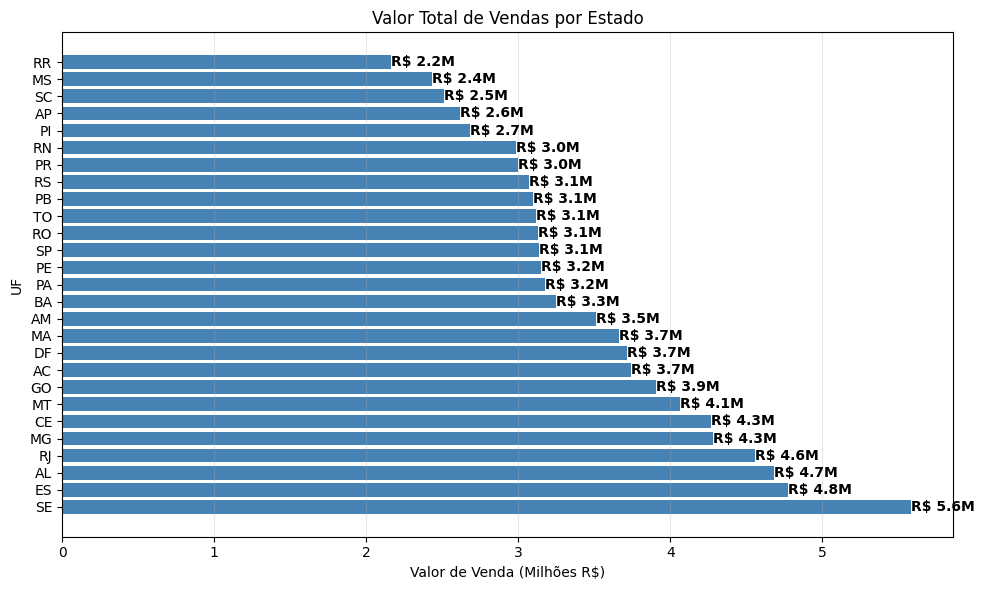

In [131]:

plt.figure(figsize=(10, 6))
bars = plt.barh(agrupando_uf['uf'], [v/1e6 for v in agrupando_uf['valor_venda']], color='steelblue')
plt.xlabel('Valor de Venda (Milhões R$)')
plt.ylabel('UF')
plt.title('Valor Total de Vendas por Estado')
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'R$ {width:.1f}M', 
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()
